# Testing EZNet's Auxiliary and Temporal Convolutional Networks

7/1/18: Now that I have coded up the fragility training and testing data from fragility algorithm, we have set image sizes.

1x60 and 30x60, which are inputs to the TCN and AuxNet, combining to form EZNet.

We want to test each of these components separately.

In [25]:
import sys
import numpy as np 
import os

import keras
import tensorflow as tf

sys.path.append('../../../')
import dnn

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from dnn.keras_models.nets.eznet import EZNet

# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# Define Model Parameters

In [17]:
# define model
model_params = {
    'length_imsize': 30,
    'width_imsize': 60,
    'num_classes': 2,
    'n_colors': 1,
}

# initialize object
eznet = EZNet(**model_params) 
print(eznet)

In [11]:
# parameters for TCN
dilations = [1,2,4,6]
numfilters = 24
kernel_size = 3
nb_stacks=1
activation = 'norm_relu'

tcn = eznet.build_dilatedtcn(dilations, 
                            numfilters, kernel_size, 
                            nb_stacks, activation=activation)

In [12]:
print(tcn.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 60, 1)        0                                            
__________________________________________________________________________________________________
initial_conv (Conv1D)           (None, 60, 24)       96          input_layer[0][0]                
__________________________________________________________________________________________________
dilated_conv_2_relu_s0 (Conv1D) (None, 60, 24)       1752        initial_conv[0][0]               
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 60, 24)       0           dilated_conv_2_relu_s0[0][0]     
__________________________________________________________________________________________________
lambda_2 (

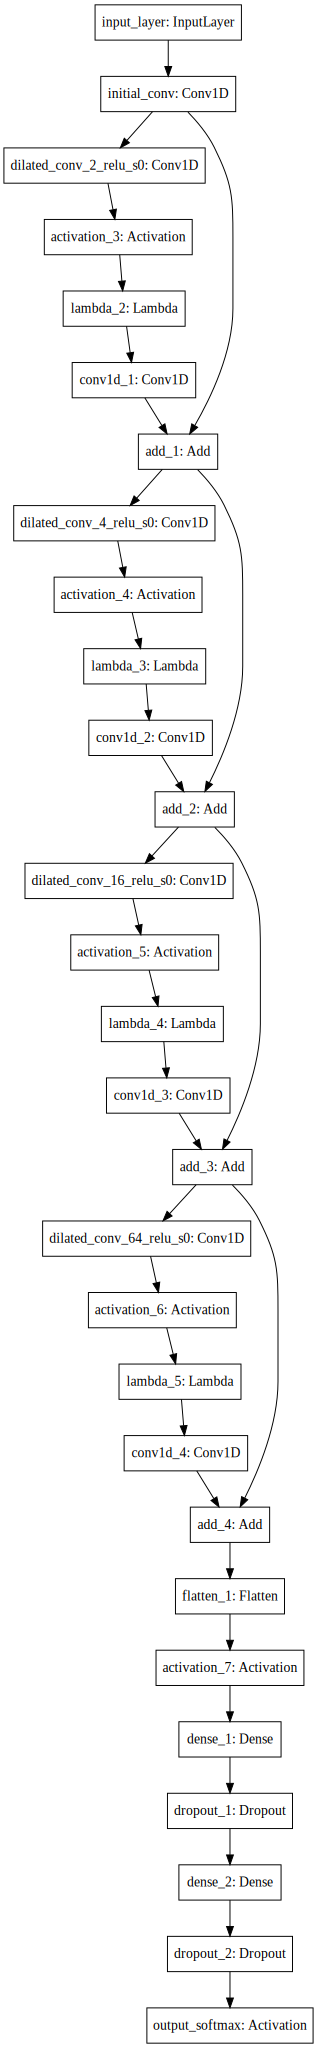

In [10]:

SVG(model_to_dot(tcn).create(prog='dot', format='svg'))

# Build Auxiliary Network

In [13]:
# parameters for AuxNet
numfilters = 24
poolsize=((1,2))
kernel_size=(1,2)
dilation = (1,1)
nb_stacks = 1
n_layers = [4, 2, 1]


In [14]:
vgg = eznet.build_vgg(n_layers,
                    poolsize,
                    numfilters,
                    kernel_size, 
                    nb_stacks)

In [15]:
print(vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
aux_input_layer (InputLayer) (None, 30, 60, 1)         0         
_________________________________________________________________
vgg_conv_0_relu_s0 (Conv2D)  (None, 30, 59, 24)        72        
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 59, 24)        96        
_________________________________________________________________
activation_15 (Activation)   (None, 30, 59, 24)        0         
_________________________________________________________________
vgg_conv_0_relu_s1 (Conv2D)  (None, 30, 58, 24)        1176      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 58, 24)        96        
_________________________________________________________________
activation_16 (Activation)   (None, 30, 58, 24)        0         
__________

# Combine Networks

In [23]:
model = eznet.buildmodel(output=True)

In [24]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
aux_input_layer (InputLayer)    (None, 30, 60, 1)    0                                            
__________________________________________________________________________________________________
vgg_conv_0_relu_s0 (Conv2D)     (None, 30, 59, 24)   72          aux_input_layer[0][0]            
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 30, 59, 24)   96          vgg_conv_0_relu_s0[0][0]         
__________________________________________________________________________________________________
input_layer (InputLayer)        (None, 60, 1)        0                                            
__________________________________________________________________________________________________
activation

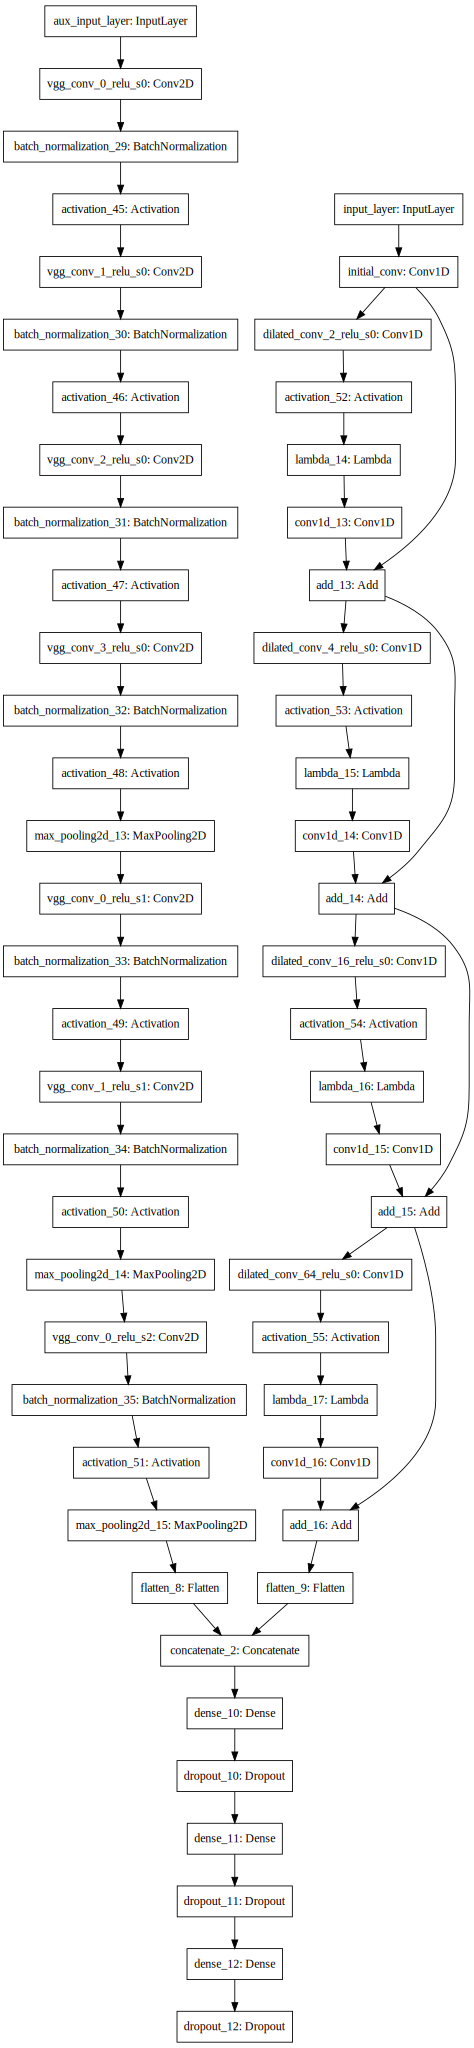

In [26]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))